In [6]:
import numpy as np
import matplotlib.pyplot as plt
import copy

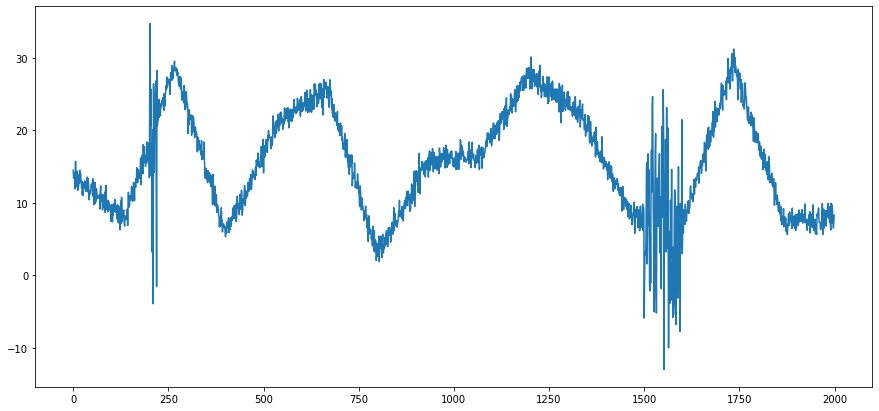

In [4]:
## generate signal with varying variability
n = 2000
p = 15  # poles for random interpolation

# amplitude modulator
signal1 = np.interp(np.linspace(0, p, n), np.arange(0, p), np.random.rand(p) * 30)
signal1 = signal1 + np.random.randn(n)

# add some high-amplitude noise
signal1[200:221] = signal1[200:221] + np.random.randn(21) * 9
signal1[1500:1601] = signal1[1500:1601] + np.random.randn(101) * 9

plt.figure(figsize=(15, 7))
plt.plot(signal1)
plt.show()


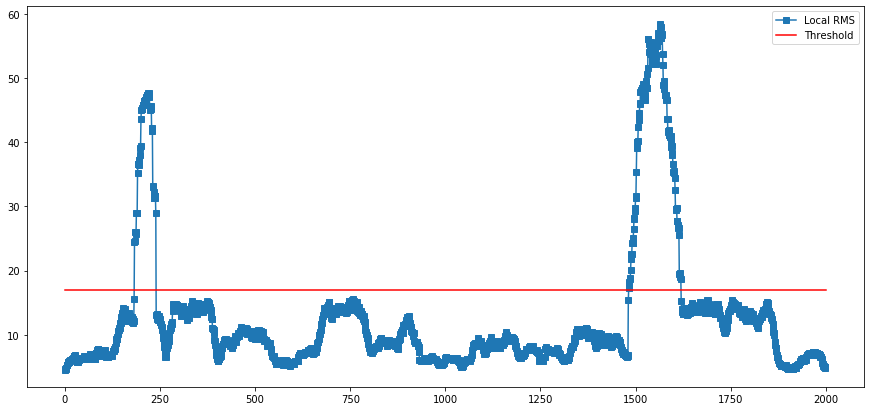

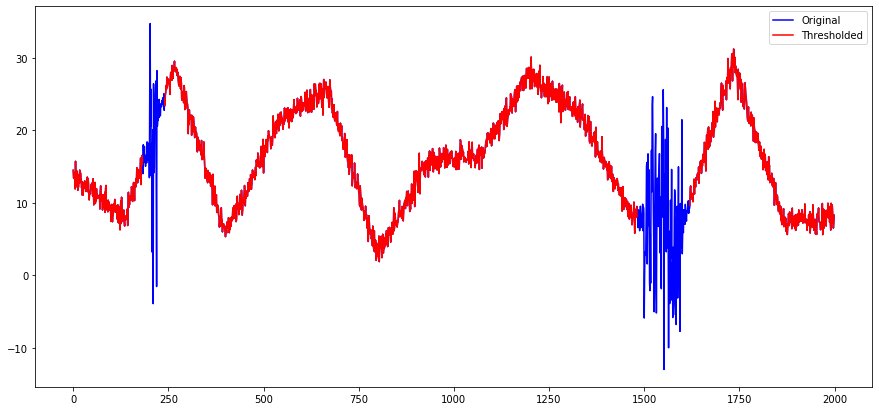

In [11]:
## detect bad segments using sliding RMS

# window size as percent of total signal length
pct_win = 2  # in percent, not proportion!

# convert to indices
k = int(n * (pct_win / 2 / 100))

# initialize RMS time series vector
rms_ts = np.zeros(n)

for ti in range(0, n):
    # boundary points
    low_bnd = int(np.max((0, ti - k)))
    upp_bnd = int(np.min((n, ti + k)))

    # signal segment (and mean-center!)
    tmpsig = signal1[range(low_bnd, upp_bnd)]
    tmpsig = tmpsig - np.mean(tmpsig)

    # compute RMS in this window
    rms_ts[ti] = np.sqrt(np.sum(tmpsig ** 2))

# plot RMS
plt.figure(figsize=(15, 7))
plt.plot(rms_ts, 's-', label='Local RMS')

# pick threshold manually based on visual inspection
thresh = 17

plt.plot([0, n], [thresh, thresh], 'r', label='Threshold')
plt.legend()
plt.show()

# mark bad regions in original time series
signalR = copy.deepcopy(signal1)
signalR[rms_ts > thresh] = np.nan

plt.figure(figsize=(15, 7))
plt.plot(signal1, 'b', label='Original')
plt.plot(signalR, 'r', label='Thresholded')
plt.legend()
plt.show()
